In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [2]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)


In [ ]:
def f(x):
    if x < 0.25:
        return x
    elif x >= 0.25 and x <= 0.5:
        return x+0.5
    else:
        return 1-(x-0.5)*2

In [3]:
def heat_kernel(x, y, gamma, d):
    return ((2*np.pi)**(-d/2))*(gamma**(-d))*np.exp((-(x-y)**2)/(2*gamma**2))

In [4]:
N = 1000
grid = np.arange(0,1,1/N)#datagrid


In [5]:

matrix = np.zeros((N, N))

for i in range(0,N):
    for j in range(0,N):
        if i < j:
            matrix[i,j] = grid[i]
        else:
            matrix[i,j] = grid[j]
        

In [6]:
gamma = 0.039
#calculation of the right hand side of the normal equation
n = 100
grid_ = np.arange(0,1,1/n)#recongrid
norm_dat_ = np.zeros((N,n))
for j in range(0,n):#size of the recon_grid
    tmp = np.zeros((N))
    for i in range(0,N):
        #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
        tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
        #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
    norm_dat_[:,j] = tmp


In [7]:
theta = 0.001
recon_kernel_grid_ = np.zeros((N,n))

recon_kernel_grid_ = np.linalg.solve(matrix+theta*np.eye(N), norm_dat_)


In [9]:
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
data = np.array(data)
epsilon = (np.random.rand(1,N)-0.5)
epsilon = np.reshape(epsilon, (N))
epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(data)*0.5
g_ = data+epsilon
print(np.linalg.norm(g_-data)/np.linalg.norm(data))
g_ = np.reshape(g_, (N,1))

0.5000000000000001


In [10]:

#solution_grid = np.transpose(g)@recon_kernel_grid
solution_grid_ = np.transpose(g_)@recon_kernel_grid_


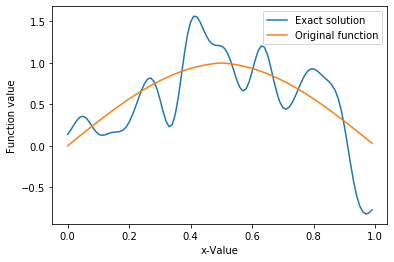

In [12]:
import matplotlib.pyplot as plt
solution_grid_ = np.reshape(solution_grid_, (n))

plt.plot(grid_, solution_grid_, label='Exact solution')
true_function = []
for val in grid_:
    true_function.append(f(val))
plt.plot(grid_, true_function, label='Original function')
plt.xlabel('x-Value')
plt.ylabel('Function value')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
solution_grid = np.reshape(solution_grid, (n))
solution_grid_ = np.reshape(solution_grid_, (n))
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].plot(grid_, solution_grid, label='Exact solution')
axs[0].plot(grid_, true_function, label='Original function')
axs[1].plot(grid_, solution_grid_, label='Solution with 5% noise')
axs[1].plot(grid_, true_function, label='Original function')
fig.legend()


In [ ]:
values = np.arange(0.001,0.08,0.001)
error = []
for gamma in values:
    #calculation of the right hand side of the normal equation
    n = 100
    grid_ = np.arange(0,1,1/n)#recongrid
    norm_dat = np.zeros((N,n))
    for j in range(0,n):#size of the recon_grid
        tmp = np.zeros((N))
        for i in range(0,N):
            #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
            tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
            #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
        norm_dat[:,j] = tmp
    #####
    theta = 0.001
    recon_kernel_grid = np.zeros((N,n))

    recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)
    #####
    epsilon = []
    epsilon = (np.random.rand(1,N)-0.5)
    ###
    data = []
    for i in range(0,N):
        data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
    data = np.array(data)
    epsilon = np.array(epsilon)
    epsilon = np.reshape(epsilon, (N))
    epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(g)*0.05
    g = data+epsilon
    g = np.reshape(g, (N,1))
    
    solution_grid = np.transpose(g)@recon_kernel_grid
    solution_grid = np.reshape(solution_grid, (n))
    true_function = []
    for val in grid_:
        true_function.append(f(val))
    error.append(np.linalg.norm(np.array(true_function)-solution_grid))

In [ ]:

plt.plot(values[10::], error[10::])
plt.plot(x, y, 'bo', markersize=3, label='Data')
plt.plot(x, model_poly(theta, x), label='Model')
plt.plot(x, np.sin(np.pi*2*x), label='Sinus')
plt.xlabel('X-Value')
plt.ylabel('Y-Value')
plt.legend()
plt.savefig('Graph', format='pdf')